# Prediction of Credit Risk

## Part 1: Data Preprocessing and EDA

### In this project, we'll be using [German Statlog Dataset](http://archive.ics.uci.edu/dataset/144/statlog+german+credit+data) from UCI Machine Learning Repository. We name the columns base on the discription of each feature.

### Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

from ipynb.fs.defs.func import histogram, measures, evaluation_plot
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold

### Load Dataset

In [4]:
df = pd.read_excel('German_Credit.xlsx')
df

,checking account,Duration,Credit_his,Purpose,Credit amount,Savings account,Present_emp,Installment rate,sex,other_debtor,...,Property,Age,Other_install,Housing,Num_credits,Job,Num_people,Telephone,Foreign worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Exploratory Data Analysis and Data Quality Assessment

### Handling Missing Values

In [8]:
df = df.replace('?', np.nan)
df.isnull().sum()

checking account    0
Duration            0
Credit_his          0
Purpose             0
Credit amount       0
Savings account     0
Present_emp         0
Installment rate    0
sex                 0
other_debtor        0
Present_resid       0
Property            0
Age                 0
Other_install       0
Housing             0
Num_credits         0
Job                 0
Num_people          0
Telephone           0
Foreign worker      0
Class               0
dtype: int64

In [10]:
df.describe().T.style.background_gradient(cmap = 'Blues').set_properties()

,count,mean,std,min,25%,50%,75%,max
Duration,1000.000000,20.903000,12.058814,4.000000,12.000000,18.000000,24.000000,72.000000
Credit amount,1000.000000,3271.258000,2822.736876,250.000000,1365.500000,2319.500000,3972.250000,18424.000000
Installment rate,1000.000000,2.973000,1.118715,1.000000,2.000000,3.000000,4.000000,4.000000
Present_resid,1000.000000,2.845000,1.103718,1.000000,2.000000,3.000000,4.000000,4.000000
Age,1000.000000,35.546000,11.375469,19.000000,27.000000,33.000000,42.000000,75.000000
Num_credits,1000.000000,1.407000,0.577654,1.000000,1.000000,1.000000,2.000000,4.000000
Num_people,1000.000000,1.155000,0.362086,1.000000,1.000000,1.000000,1.000000,2.000000
Class,1000.000000,1.300000,0.458487,1.000000,1.000000,1.000000,2.000000,2.000000


### Data Encoding

In [13]:
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])
    
df= pd.get_dummies(df, columns = ['checking account', 'Credit_his', 'Purpose',
                                  'Savings account','Present_emp','sex','other_debtor',
                                 'Property','Other_install','Housing','Job'])
df['Class']=df['Class']-1
df

,Duration,Credit amount,Installment rate,Present_resid,Age,Num_credits,Num_people,Telephone,Foreign worker,Class,...,Other_install_0,Other_install_1,Other_install_2,Housing_0,Housing_1,Housing_2,Job_0,Job_1,Job_2,Job_3
0,6,1169,4,4,67,2,1,1,0,0,...,False,False,True,False,True,False,False,False,True,False
1,48,5951,2,2,22,1,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False
2,12,2096,2,3,49,1,2,0,0,0,...,False,False,True,False,True,False,False,True,False,False
3,42,7882,2,4,45,1,2,0,0,0,...,False,False,True,False,False,True,False,False,True,False
4,24,4870,3,4,53,2,2,0,0,1,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,0,...,False,False,True,False,True,False,False,True,False,False
996,30,3857,4,4,40,1,1,1,0,0,...,False,False,True,False,True,False,False,False,False,True
997,12,804,4,4,38,1,1,0,0,0,...,False,False,True,False,True,False,False,False,True,False
998,45,1845,4,4,23,1,1,1,0,1,...,False,False,True,False,False,True,False,False,True,False


## Data Visualization

### Class Distribution

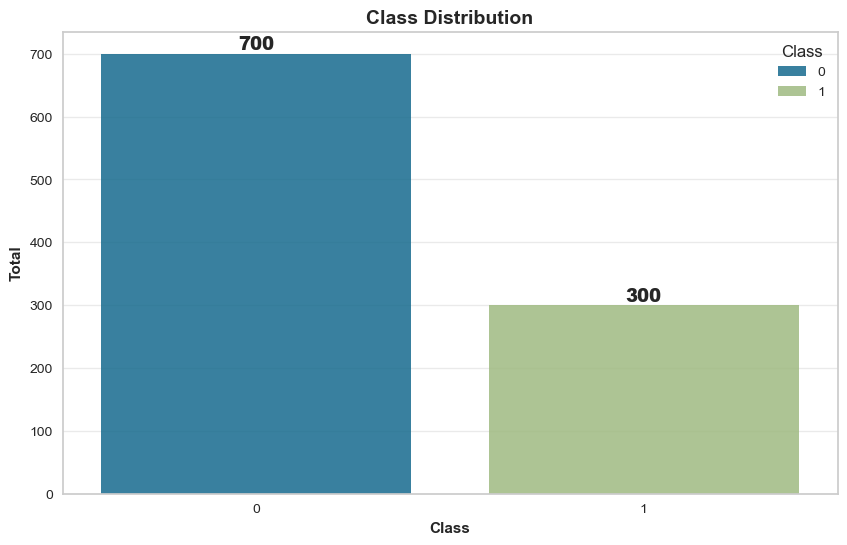

In [20]:
# Create the countplot
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Class', data=df, order=df['Class'].value_counts().index, alpha=0.85, hue='Class')
for container in ax.containers:  # Iterate through all containers (one for each bar plot)
        ax.bar_label(container, fontweight="black", size=13)
plt.xlabel('Class', fontweight='bold', fontsize=11)
plt.ylabel('Total', fontweight='bold', fontsize=11)
plt.xticks([0, 1])
plt.title('Class Distribution', fontweight='bold', fontsize=14)
plt.grid(axis='y', alpha=0.4)
plt.show()


### Removing 100 random instances for more balanced data 

In [23]:
import random
data = df[df['Class'] == 0].index

random_indexes = np.random.choice(len(data), size = 100, replace = False)
indexes_to_remove = [data[i] for i in random_indexes]
df.drop(indexes_to_remove, inplace=True)

df.Class.value_counts()

Class
0    600
1    300
Name: count, dtype: int64

### Numerical Feature Distribution

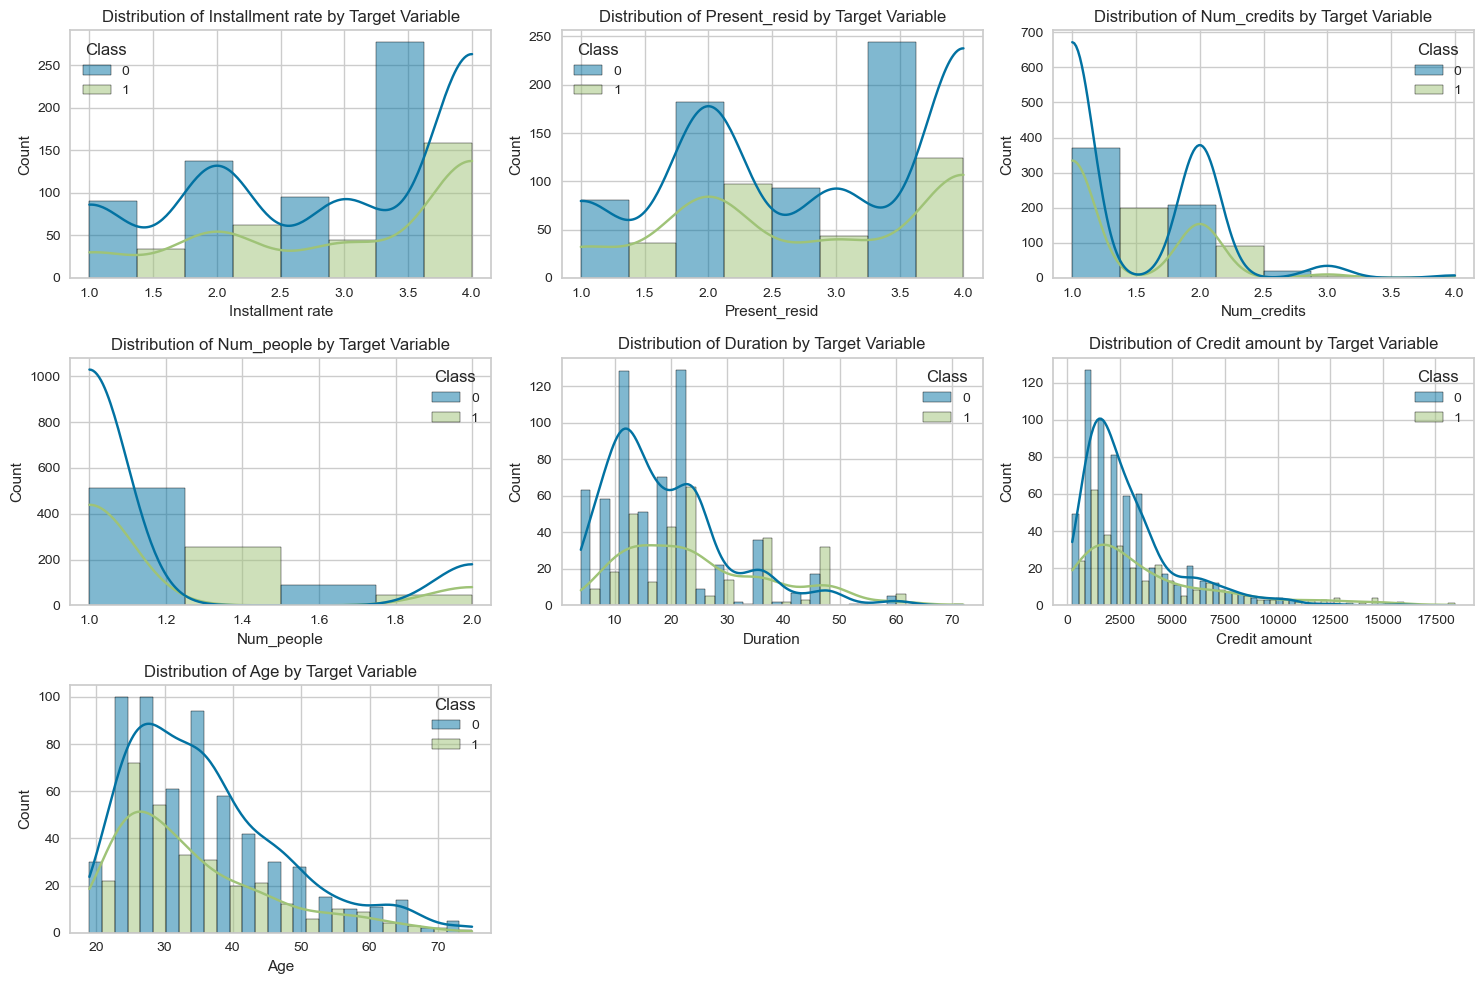

In [26]:
# List of numerical columns
numerical_columns = ['Installment rate', 'Present_resid', 'Num_credits', 'Num_people', 'Duration', 'Credit amount', 'Age']

# Define a dictionary for custom bins per feature
custom_bins = {
    'Installment rate': 4,
    'Present_resid': 4,
    'Num_credits': 4,
    'Num_people': 2,
    'Duration': 20,
    'Credit amount': 30,
    'Age': 15
}

# Plot histograms with custom bins
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, hue='Class', kde=True, multiple="dodge", bins=custom_bins[column])
    plt.title(f'Distribution of {column} by Target Variable')

plt.tight_layout()
plt.show()


### Categorical Features Distribution

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 999
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Duration            900 non-null    int64
 1   Credit amount       900 non-null    int64
 2   Installment rate    900 non-null    int64
 3   Present_resid       900 non-null    int64
 4   Age                 900 non-null    int64
 5   Num_credits         900 non-null    int64
 6   Num_people          900 non-null    int64
 7   Telephone           900 non-null    int32
 8   Foreign worker      900 non-null    int32
 9   Class               900 non-null    int64
 10  checking account_0  900 non-null    bool 
 11  checking account_1  900 non-null    bool 
 12  checking account_2  900 non-null    bool 
 13  checking account_3  900 non-null    bool 
 14  Credit_his_0        900 non-null    bool 
 15  Credit_his_1        900 non-null    bool 
 16  Credit_his_2        900 non-null    bool 
 17  Cr

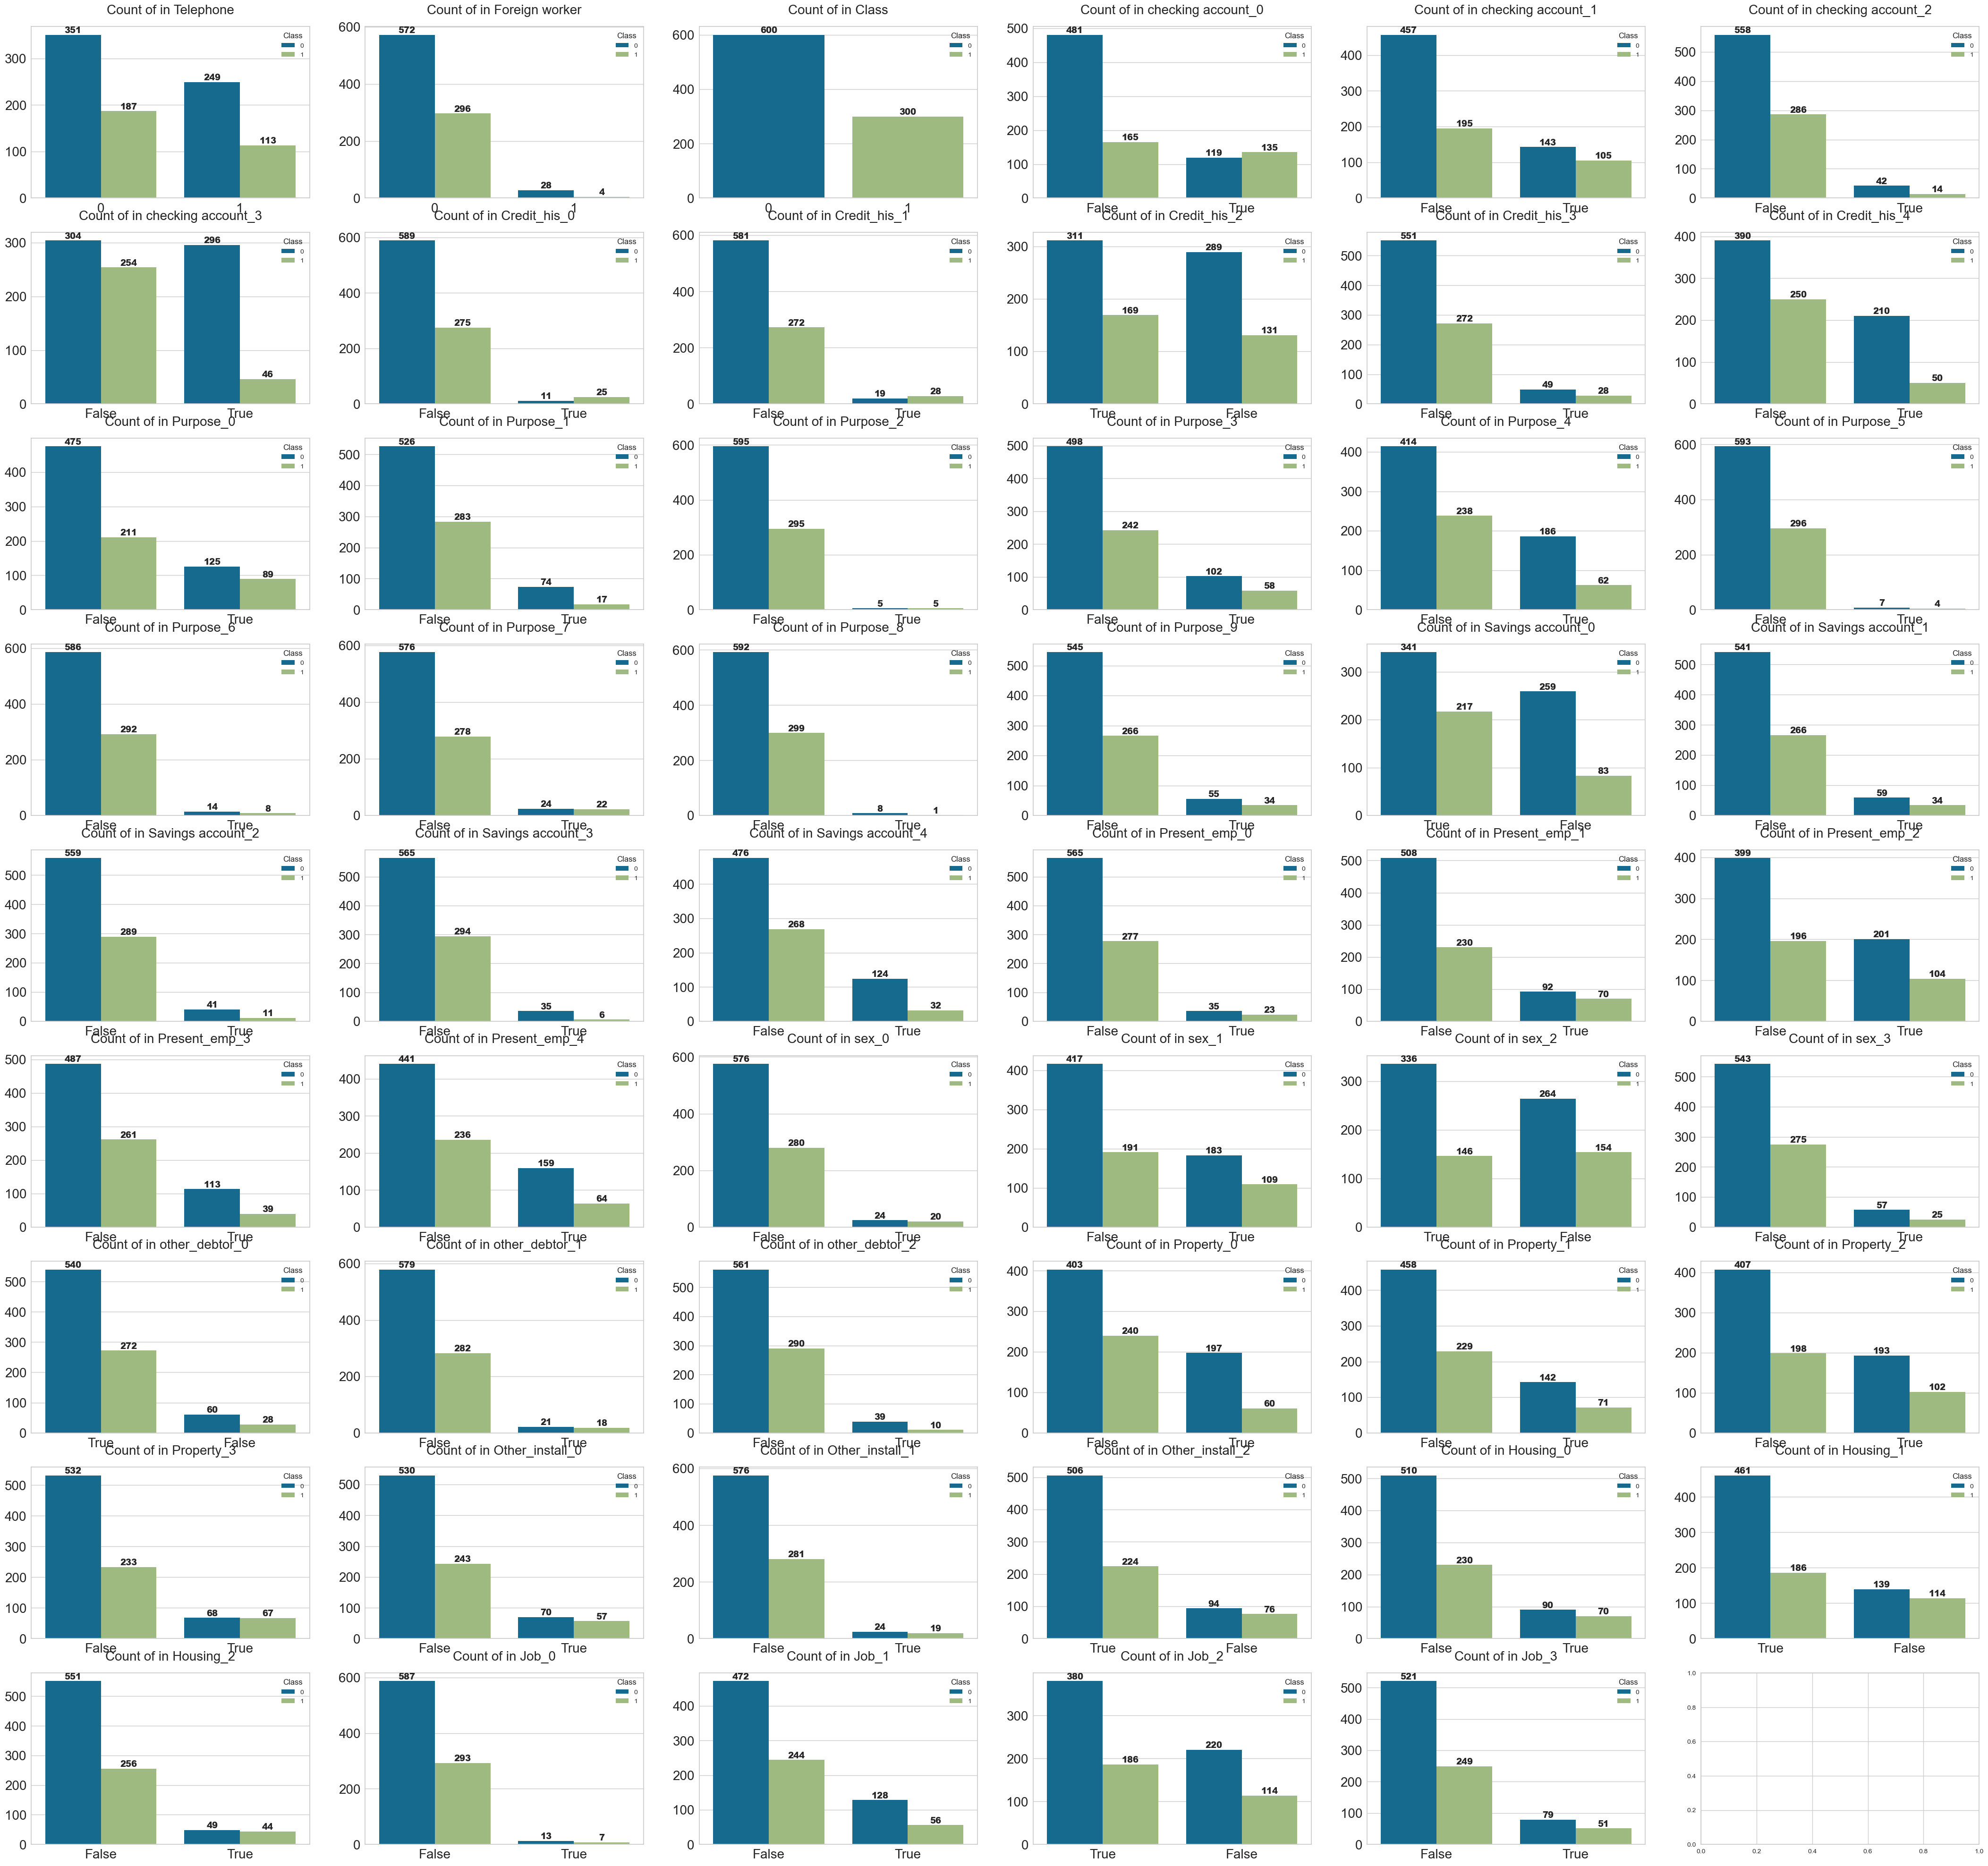

In [71]:
cat_feat= df.drop(['Duration','Credit amount','Installment rate','Present_resid',
            'Age','Num_credits','Num_people'], axis=1)

fig, axs = plt.subplots(ncols=6, nrows=9, figsize=(30,50))
plt.subplots_adjust(right=1.5)

for i , col in enumerate(cat_feat):
  plt.subplot(9, 6, i+1)
  ax = sns.countplot(x=df[col], hue=df['Class'], order=df[col].value_counts().index)
  for container in ax.containers:
      ax.bar_label(container, fontweight="black", size=13)
  plt.xlabel('')
  plt.ylabel('')
  plt.tick_params(axis='x', labelsize=20)
  plt.tick_params(axis='y', labelsize=20)
  plt.title('Count of in {}'.format(col), size=20, y=1.05)

plt.show() 



### Feature Scaling and Target Extraction

In [73]:
x = df.drop(['Class'], axis=1)
col = x.columns.tolist()
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x, columns = col)

y = df['Class']

### Exploring Feature Correlations with a Heatmap

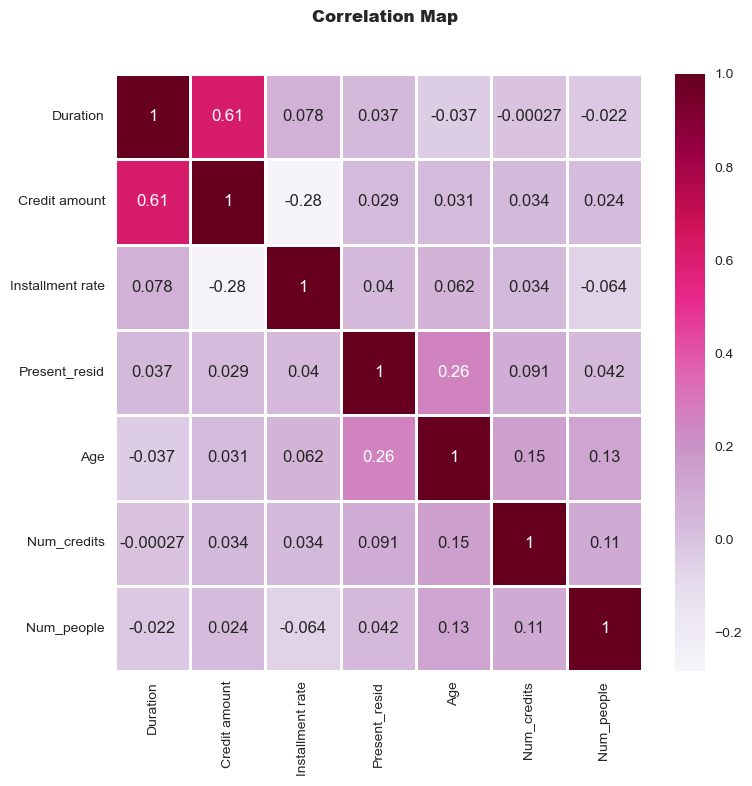

In [76]:
plt.figure(figsize=(8, 8))
sns.heatmap(x[['Duration','Credit amount','Installment rate','Present_resid',
            'Age','Num_credits','Num_people']].corr(), annot=True, cmap='PuRd', linewidths= 0.75, )
plt.suptitle('Correlation Map', fontweight='heavy', x=0.4, y=1.02, 
             ha='left', fontsize='12')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show()

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0,shuffle=True)

## Importing the Processed Data into Pickle Files

In [81]:
with open('x_train.pickle', 'wb')as file:
    pickle.dump(x_train, file)
    
with open('x_test.pickle', 'wb')as file:
    pickle.dump(x_test, file)

In [83]:
with open('y_train.pickle', 'wb')as file:
    pickle.dump(y_train, file)
    
with open('y_test.pickle', 'wb')as file:
    pickle.dump(y_test, file)

In [85]:
x_train.shape, x_test.shape

((720, 59), (180, 59))